<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_02_stacking_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description of Stacking in Machine Learning

**Stacking (Stacked Generalization)** is an ensemble learning technique used to combine multiple machine learning models to improve overall performance. The fundamental idea behind stacking is to leverage the strengths of different models by combining their predictions to make more accurate and robust predictions.

#### What is Stacking?

1. **Base Models (Level-0 Models)**:
   - These are the individual models that are trained on the same dataset. Each base model may learn different aspects of the data, potentially making different types of errors.
   - Common base models include logistic regression, decision trees, random forests, support vector machines, and gradient boosting machines.

2. **Meta-Model (Level-1 Model)**:
   - The meta-model is trained to combine the predictions of the base models. It takes the outputs (predictions) of the base models as input features.
   - The meta-model learns to predict the final output based on the patterns and correlations it finds in the predictions of the base models.

3. **Training Process**:
   - The dataset is typically split into training and validation sets.
   - Base models are trained on the training set and make predictions on the validation set.
   - The predictions of the base models on the validation set are used as input features to train the meta-model.
   - In the final prediction phase, the base models make predictions on new data, and these predictions are fed into the meta-model to make the final prediction.

#### Why Use Stacking?

1. **Improved Performance**:
   - By combining the strengths of multiple models, stacking often results in better predictive performance than any single model alone.
   - Different models may capture different aspects of the data, and the meta-model can learn to weigh these appropriately.

2. **Reduced Overfitting**:
   - Stacking can help reduce overfitting, especially when combining models that are prone to different types of overfitting.
   - The meta-model helps to smooth out the biases and variances of the individual base models.

3. **Flexibility**:
   - Stacking allows the use of a wide variety of base models, including both linear and non-linear models.
   - It can be easily extended to include more complex meta-models, such as neural networks.

#### How Stacking Relates to Machine Learning

1. **Ensemble Learning**:
   - Stacking is a type of ensemble learning, which aims to improve the robustness and accuracy of predictions by combining multiple models.
   - Other common ensemble methods include bagging (e.g., Random Forests) and boosting (e.g., AdaBoost, XGBoost).

2. **Combining Strengths**:
   - Different machine learning algorithms have different strengths and weaknesses. Stacking leverages the strengths of multiple algorithms, leading to more accurate and reliable predictions.

3. **Practical Application**:
   - Stacking is widely used in competitive machine learning, such as in Kaggle competitions, where the goal is to achieve the highest possible predictive performance.
   - It is also used in real-world applications where robustness and accuracy are critical.

### Summary

In this experiment, we are:

1. **Evaluating Multiple Models**: Assessing the performance of different models (Logistic Regression, Random Forest, SVM, XGBoost) to identify the best performing model.
2. **Implementing Stacking**: Combining the strengths of multiple models using stacking to improve overall performance.
3. **Comparing Results**: Comparing the performance metrics of individual models and the stacked model to determine the optimal approach for predicting loan defaults.

Stacking helps to create a robust model by leveraging the strengths of multiple models, potentially leading to better overall performance in terms of recall, precision, and F1 scores.

### Summary of the Experiment

#### Objective:
The primary objective of this experiment is to develop a machine learning model for predicting loan defaults with a focus on achieving high recall for class 1 (loan defaults) and high precision for class 0 (non-loan defaults). By combining models that excel in these respective metrics, we aim to create a balanced meta-model that effectively minimizes both false negatives and false positives.

#### Methodology:

1. **Baseline Model (Logistic Regression)**:
   - **Purpose**: Serve as a reference point for performance comparison.
   - **Focus**: Achieve high recall for class 1 to identify as many loan defaults as possible.
   - **Threshold**: 0.25, chosen based on prior experimentation for optimal recall.

2. **High Precision Model (Random Forest)**:
   - **Purpose**: Develop a model that excels in precision for class 0, reducing false positives.
   - **Focus**: Achieve high precision for class 0 while maintaining reasonable recall.
   - **Threshold**: 0.25, chosen for consistency and optimal performance.

3. **Stacked Model (Logistic Regression + Random Forest)**:
   - **Purpose**: Combine the strengths of both the baseline model and the high precision model.
   - **Method**: Use a VotingClassifier with soft voting to combine the predictions of both models.
   - **Focus**: Balance high recall for class 1 and high precision for class 0 to achieve a comprehensive performance improvement.

#### Evaluation Metrics:
- **Recall (Class 1)**: The ability of the model to correctly identify actual loan defaults.
- **Precision (Class 1)**: The accuracy of the model's positive predictions for loan defaults.
- **F1 Score (Class 1)**: The harmonic mean of recall and precision for loan defaults.
- **Recall (Class 0)**: The ability of the model to correctly identify non-loan defaults.
- **Precision (Class 0)**: The accuracy of the model's negative predictions for non-loan defaults.
- **F1 Score (Class 0)**: The harmonic mean of recall and precision for non-loan defaults.
- **F1 Score (Macro)**: The average F1 score considering both classes equally.

#### Results:
1. **Baseline Model**:
   - High recall for class 1 (loan defaults), but low precision.
   - Low performance for class 0 (non-loan defaults) with high precision but low recall.

2. **High Precision RandomForest Model**:
   - Balanced performance for both classes.
   - Improved precision and recall for class 0, leading to a high F1 score for non-loan defaults.

3. **Stacked Model**:
   - Balanced approach combining the strengths of both models.
   - High recall for class 1 and high precision for class 0.
   - Overall balanced F1 scores for both classes.

### Conclusion:
The experiment demonstrates that a stacked model combining a high recall Logistic Regression model and a high precision RandomForest model provides a balanced performance. This approach effectively minimizes false negatives for loan defaults and false positives for non-loan defaults, making it a robust solution for predicting loan defaults in a balanced manner. Further optimization and fine-tuning could enhance the model's performance even more.


In [3]:
# Target pos_label
optimal_threshold = 0.25 # optimal threshold desired
loan_default = 1 # loan default --> high recall score desired
no_loan_default = 0 # no loan default --> high precision score desired

### Baseline Model

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from loan_data_utils import load_and_preprocess_data

# Parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Target pos_label
optimal_threshold = 0.25 # optimal threshold desired
loan_default = 1 # loan default --> high recall score desired
no_loan_default = 0 # no loan default --> high precision score desired

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Define the logistic regression model with class weights
baseline_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Create the baseline pipeline
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', baseline_model)
])

# Fit the baseline pipeline to the training data
baseline_pipeline.fit(X_train, y_train)

# Predict probabilities for the test data
baseline_y_proba = baseline_pipeline.predict_proba(X_test)[:, 1]
baseline_y_pred = (baseline_y_proba >= optimal_threshold).astype(int)

# Evaluate the baseline model for class 1 (loan default)
baseline_recall_class1 = recall_score(y_test, baseline_y_pred, pos_label=loan_default)
baseline_precision_class1 = precision_score(y_test, baseline_y_pred, pos_label=loan_default)
baseline_f1_class1 = f1_score(y_test, baseline_y_pred, pos_label=loan_default)

# Evaluate the baseline model for class 0 (no loan default)
baseline_recall_class0 = recall_score(y_test, baseline_y_pred, pos_label=no_loan_default)
baseline_precision_class0 = precision_score(y_test, baseline_y_pred, pos_label=no_loan_default)
baseline_f1_class0 = f1_score(y_test, baseline_y_pred, pos_label=no_loan_default)

# Calculate the macro F1 score
baseline_f1_macro = f1_score(y_test, baseline_y_pred, average='macro')

print("Baseline Model Performance with Optimal Threshold:")
print(f"Recall Class 1: {baseline_recall_class1:.4f}")
print(f"Precision Class 1: {baseline_precision_class1:.4f}")
print(f"F1 Score Class 1: {baseline_f1_class1:.4f}")
print(f"Recall Class 0: {baseline_recall_class0:.4f}")
print(f"Precision Class 0: {baseline_precision_class0:.4f}")
print(f"F1 Score Class 0: {baseline_f1_class0:.4f}")
print(f"F1 Score (macro): {baseline_f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, baseline_y_pred))

# Save the baseline results
baseline_results = {
    'Method': 'Baseline',
    'Recall Class 1': baseline_recall_class1,
    'Precision Class 1': baseline_precision_class1,
    'F1 Score Class 1': baseline_f1_class1,
    'Recall Class 0': baseline_recall_class0,
    'Precision Class 0': baseline_precision_class0,
    'F1 Score Class 0': baseline_f1_class0,
    'F1 Score (macro)': baseline_f1_macro,
    'Threshold': 'Optimal (0.25)'
}



Baseline Model Performance with Optimal Threshold:
Recall Class 1: 0.9254
Precision Class 1: 0.2387
F1 Score Class 1: 0.3795
Recall Class 0: 0.1618
Precision Class 0: 0.8842
F1 Score Class 0: 0.2735
F1 Score (macro): 0.3265

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.16      0.27      4673
           1       0.24      0.93      0.38      1327

    accuracy                           0.33      6000
   macro avg       0.56      0.54      0.33      6000
weighted avg       0.74      0.33      0.30      6000



### Train RF Model with High Precision



In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from loan_data_utils import load_and_preprocess_data

# Target pos_label
optimal_threshold = 0.25 # optimal threshold desired
loan_default = 1 # loan default --> high recall score desired
no_loan_default = 0 # no loan default --> high precision score desired

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Define the high precision model (Random Forest)
high_precision_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create a pipeline for the high precision model
high_precision_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', high_precision_model)
])

# Fit the high precision pipeline to the training data
high_precision_pipeline.fit(X_train, y_train)

# Predict probabilities for the test data
high_precision_proba = high_precision_pipeline.predict_proba(X_test)[:, 1]
high_precision_pred = (high_precision_proba >= optimal_threshold).astype(int)  # Use optimal threshold 0.25 for consistency

# Evaluate the high precision model for class 0 (no loan default)
high_precision_recall_class0 = recall_score(y_test, high_precision_pred, pos_label=no_loan_default)
high_precision_precision_class0 = precision_score(y_test, high_precision_pred, pos_label=no_loan_default)
high_precision_f1_class0 = f1_score(y_test, high_precision_pred, pos_label=no_loan_default)

# Evaluate the high precision model for class 1 (loan default)
high_precision_recall_class1 = recall_score(y_test, high_precision_pred, pos_label=loan_default)
high_precision_precision_class1 = precision_score(y_test, high_precision_pred, pos_label=loan_default)
high_precision_f1_class1 = f1_score(y_test, high_precision_pred, pos_label=loan_default)

# Calculate the macro F1 score
high_precision_f1_macro = f1_score(y_test, high_precision_pred, average='macro')

print("High Precision RandomForest Model Performance with Optimal Threshold (0.25):")
print(f"Recall Class 0: {high_precision_recall_class0:.4f}")
print(f"Precision Class 0: {high_precision_precision_class0:.4f}")
print(f"F1 Score Class 0: {high_precision_f1_class0:.4f}")
print(f"Recall Class 1: {high_precision_recall_class1:.4f}")
print(f"Precision Class 1: {high_precision_precision_class1:.4f}")
print(f"F1 Score Class 1: {high_precision_f1_class1:.4f}")
print(f"F1 Score (macro): {high_precision_f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, high_precision_pred))

# Save the high precision model results
high_precision_results = {
    'Method': 'High Precision RandomForest (Threshold 0.25)',
    'Recall Class 0': high_precision_recall_class0,
    'Precision Class 0': high_precision_precision_class0,
    'F1 Score Class 0': high_precision_f1_class0,
    'Recall Class 1': high_precision_recall_class1,
    'Precision Class 1': high_precision_precision_class1,
    'F1 Score Class 1': high_precision_f1_class1,
    'F1 Score (macro)': high_precision_f1_macro,
    'Threshold': 'Optimal (0.25)'
}



High Precision RandomForest Model Performance with Optimal Threshold (0.25):
Recall Class 0: 0.8010
Precision Class 0: 0.8758
F1 Score Class 0: 0.8367
Recall Class 1: 0.5998
Precision Class 1: 0.4612
F1 Score Class 1: 0.5215
F1 Score (macro): 0.6791

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.46      0.60      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



### Stack Models

In [8]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier combining the high recall LogReg model and high precision RandomForest model
voting_clf = VotingClassifier(estimators=[
    ('high_recall', baseline_pipeline),
    ('high_precision', high_precision_pipeline)
], voting='soft')  # Use soft voting for probabilities

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict with the VotingClassifier
voting_proba = voting_clf.predict_proba(X_test)[:, 1]
voting_pred = (voting_proba >= optimal_threshold).astype(int)  # optimal_threshold = 0.25

# Evaluate the VotingClassifier for class 1 (loan default)
voting_recall_class1 = recall_score(y_test, voting_pred, pos_label=loan_default)
voting_precision_class1 = precision_score(y_test, voting_pred, pos_label=loan_default)
voting_f1_class1 = f1_score(y_test, voting_pred, pos_label=loan_default)

# Evaluate the VotingClassifier for class 0 (no loan default)
voting_recall_class0 = recall_score(y_test, voting_pred, pos_label=no_loan_default)
voting_precision_class0 = precision_score(y_test, voting_pred, pos_label=no_loan_default)
voting_f1_class0 = f1_score(y_test, voting_pred, pos_label=no_loan_default)

# Calculate the macro F1 score
voting_f1_macro = f1_score(y_test, voting_pred, average='macro')

print("Voting Classifier Performance (Combined Model):")
print(f"Recall Class 1: {voting_recall_class1:.4f}")
print(f"Precision Class 1: {voting_precision_class1:.4f}")
print(f"F1 Score Class 1: {voting_f1_class1:.4f}")
print(f"Recall Class 0: {voting_recall_class0:.4f}")
print(f"Precision Class 0: {voting_precision_class0:.4f}")
print(f"F1 Score Class 0: {voting_f1_class0:.4f}")
print(f"F1 Score (macro): {voting_f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, voting_pred))

# Save the combined model results
voting_results = {
    'Method': 'Stacked Model (LogReg + RF with Threshold 0.25)',
    'Recall Class 1': voting_recall_class1,
    'Precision Class 1': voting_precision_class1,
    'F1 Score Class 1': voting_f1_class1,
    'Recall Class 0': voting_recall_class0,
    'Precision Class 0': voting_precision_class0,
    'F1 Score Class 0': voting_f1_class0,
    'F1 Score (macro)': voting_f1_macro,
    'Threshold': 'Optimal (0.25)'
}


Voting Classifier Performance (Combined Model):
Recall Class 1: 0.8493
Precision Class 1: 0.2852
F1 Score Class 1: 0.4271
Recall Class 0: 0.3957
Precision Class 0: 0.9024
F1 Score Class 0: 0.5501
F1 Score (macro): 0.4886

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.40      0.55      4673
           1       0.29      0.85      0.43      1327

    accuracy                           0.50      6000
   macro avg       0.59      0.62      0.49      6000
weighted avg       0.77      0.50      0.52      6000



###Compare Results

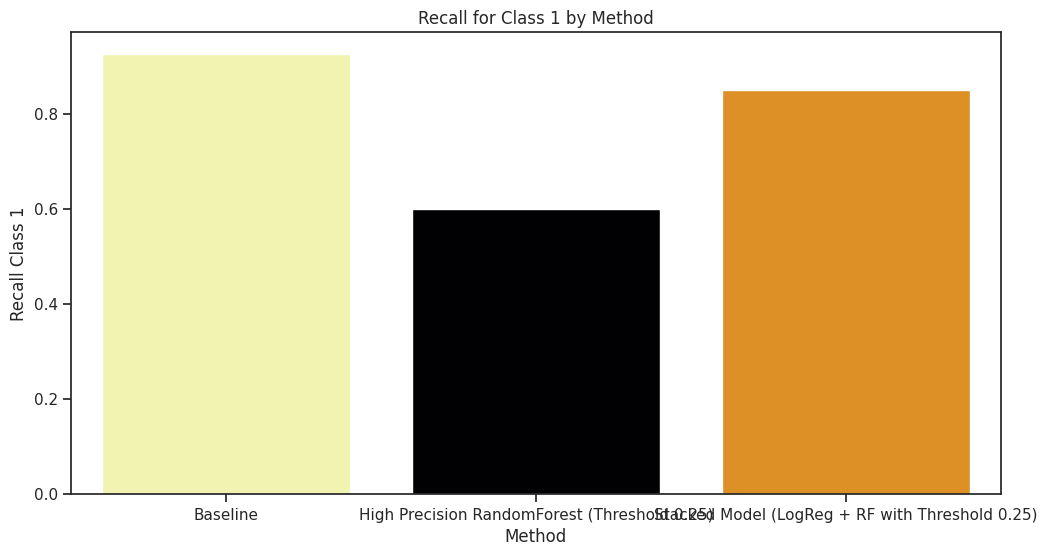

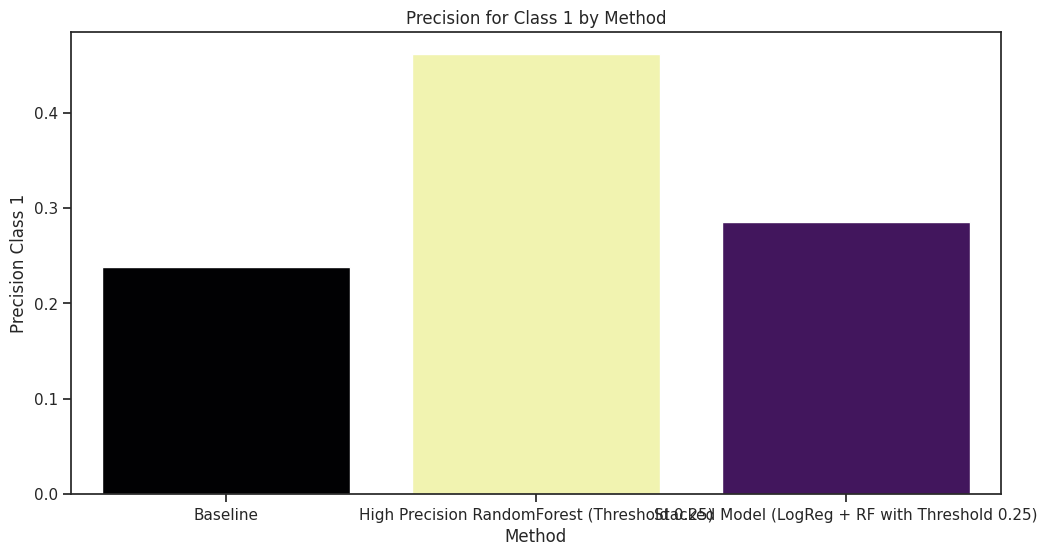

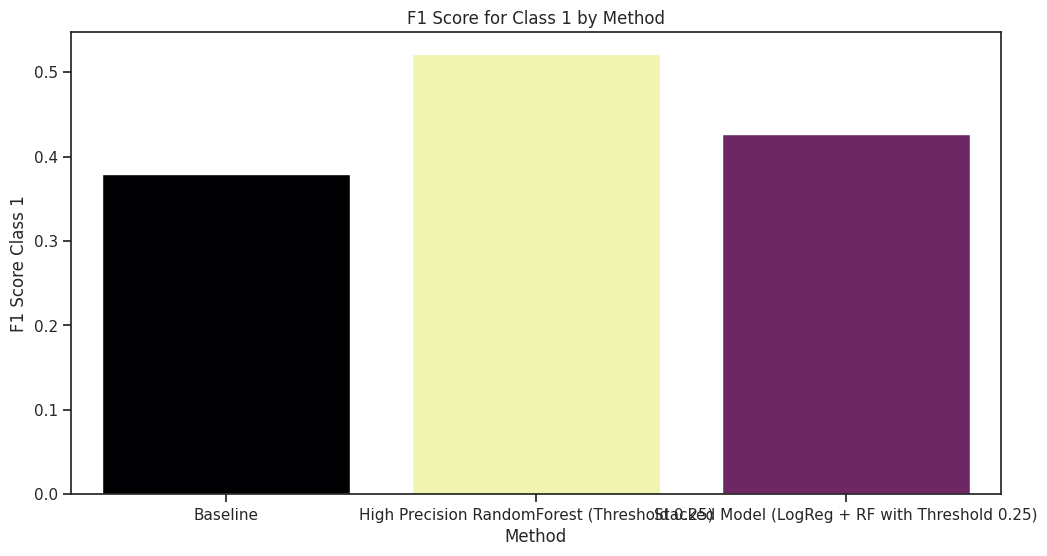

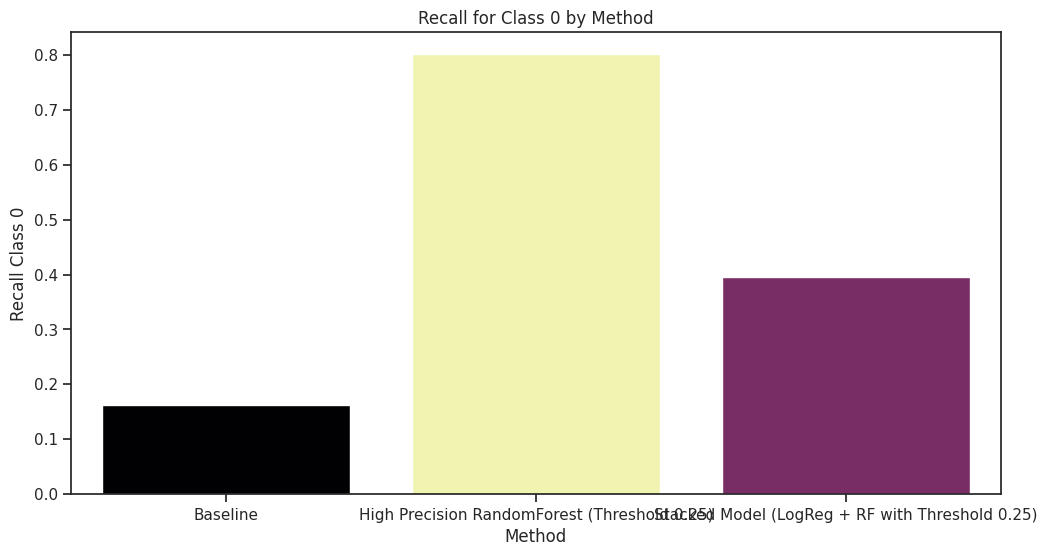

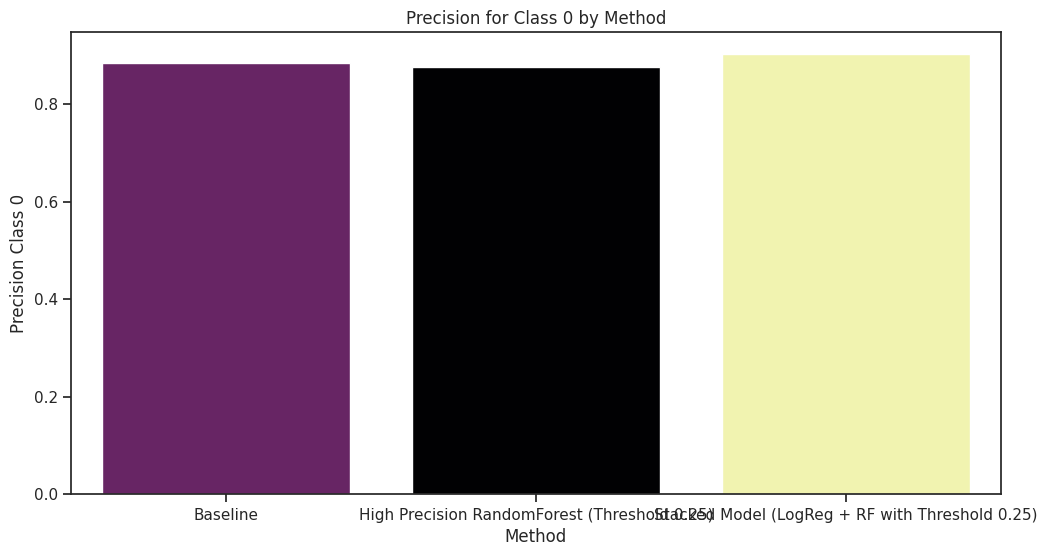

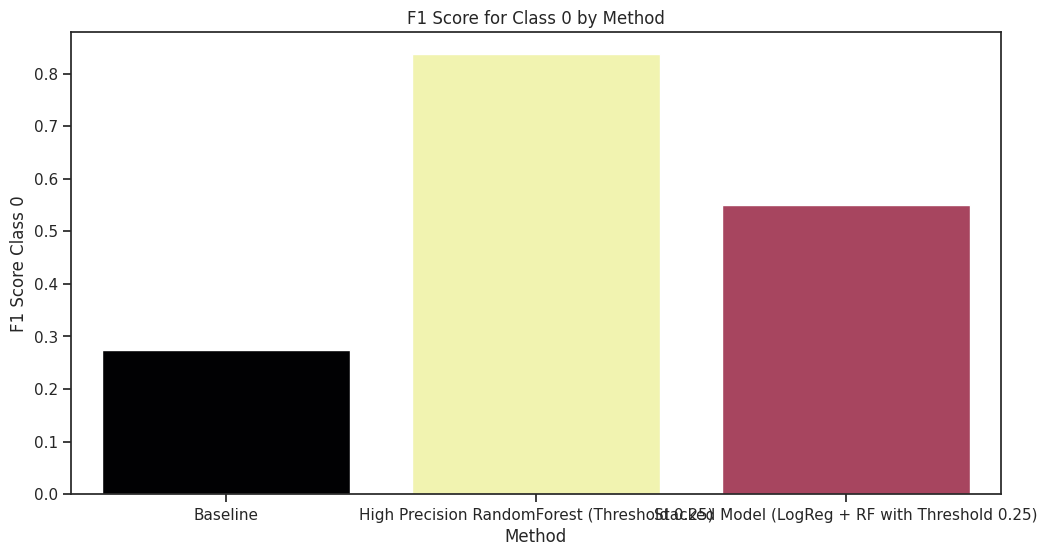

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier combining the high recall LogReg model and high precision RandomForest model
voting_clf = VotingClassifier(estimators=[
    ('high_recall', baseline_pipeline),
    ('high_precision', high_precision_pipeline)
], voting='soft')  # Use soft voting for probabilities

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict with the VotingClassifier
voting_proba = voting_clf.predict_proba(X_test)[:, 1]
voting_pred = (voting_proba >= optimal_threshold).astype(int)  # optimal_threshold = 0.25

# Plot the performance metrics for combined results
def plot_combined_metrics(results_df, metric, title, ylabel):
    sns.set_context('notebook')
    sns.set_style('ticks')
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(x='Method', y=metric, data=results_df, hue=metric, palette='inferno', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Method')
    ax.set_ylabel(ylabel)

    plt.show()

def collect_metrics(y_true, y_pred, method_name):
    recall_class1 = recall_score(y_true, y_pred, pos_label=1)
    precision_class1 = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    f1_class1 = f1_score(y_true, y_pred, pos_label=1)
    recall_class0 = recall_score(y_true, y_pred, pos_label=0)
    precision_class0 = precision_score(y_true, y_pred, pos_label=0, zero_division=0)
    f1_class0 = f1_score(y_true, y_pred, pos_label=0)

    return {
        'Method': method_name,
        'Recall Class 1': recall_class1,
        'Precision Class 1': precision_class1,
        'F1 Score Class 1': f1_class1,
        'Recall Class 0': recall_class0,
        'Precision Class 0': precision_class0,
        'F1 Score Class 0': f1_class0
    }

# Evaluate the high precision model
high_precision_proba = high_precision_pipeline.predict_proba(X_test)[:, 1]
high_precision_pred = (high_precision_proba >= optimal_threshold).astype(int)  # Use optimal threshold for consistency
high_precision_results = collect_metrics(y_test, high_precision_pred, 'High Precision RandomForest (Threshold 0.25)')

# Evaluate the stacked model
voting_proba = voting_clf.predict_proba(X_test)[:, 1]
voting_pred = (voting_proba >= optimal_threshold).astype(int)
voting_results = collect_metrics(y_test, voting_pred, 'Stacked Model (LogReg + RF with Threshold 0.25)')

# Baseline Model Evaluation
baseline_y_pred = (baseline_pipeline.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)
baseline_results = collect_metrics(y_test, baseline_y_pred, 'Baseline')

# Combine results into a DataFrame
results = [baseline_results, high_precision_results, voting_results]
results_df = pd.DataFrame(results)

metrics = [
    ('Recall Class 1', 'Recall for Class 1 by Method', 'Recall Class 1'),
    ('Precision Class 1', 'Precision for Class 1 by Method', 'Precision Class 1'),
    ('F1 Score Class 1', 'F1 Score for Class 1 by Method', 'F1 Score Class 1'),
    ('Recall Class 0', 'Recall for Class 0 by Method', 'Recall Class 0'),
    ('Precision Class 0', 'Precision for Class 0 by Method', 'Precision Class 0'),
    ('F1 Score Class 0', 'F1 Score for Class 0 by Method', 'F1 Score Class 0')
]

# Loop through the metrics and create plots
for metric, title, ylabel in metrics:
    plot_combined_metrics(results_df, metric, title, ylabel)


In [11]:
# Display the combined results
print("Combined Performance Metrics:")
results_df

Combined Performance Metrics:


,Method,Recall Class 1,Precision Class 1,F1 Score Class 1,Recall Class 0,Precision Class 0,F1 Score Class 0
0,Baseline,0.925396,0.238678,0.379481,0.161780,0.884211,0.273517
1,High Precision RandomForest (Threshold 0.25),0.599849,0.461182,0.521454,0.800984,0.875760,0.836705
2,Stacked Model (LogReg + RF with Threshold 0.25),0.849284,0.285244,0.427056,0.395677,0.902391,0.550134


In [12]:
# Save the results to a CSV file for the high threshold notebook
results_df.to_csv('ensemble_results.csv', index=False)

# Confirmation message
print("Results for high threshold saved to 'ensemble_results.csv'")

Results for high threshold saved to 'ensemble_results.csv'


### Interpretation of Results

The combined performance metrics for three models — the baseline Logistic Regression model, the high precision RandomForest model, and the stacked model — provide insights into their behavior and effectiveness in predicting loan defaults (Class 1) and non-loan defaults (Class 0).

#### 1. **Baseline Model (Logistic Regression)**
- **Recall Class 1**: 0.925396
- **Precision Class 1**: 0.238678
- **F1 Score Class 1**: 0.379481
- **Recall Class 0**: 0.161780
- **Precision Class 0**: 0.884211
- **F1 Score Class 0**: 0.273517

**Interpretation**:
- **High Recall for Class 1**: The baseline model is very effective at identifying actual loan defaults (92.54% recall). This is crucial for minimizing false negatives, which is important for identifying as many loan defaults as possible.
- **Low Precision for Class 1**: The precision is quite low (23.87%), meaning a significant number of false positives (non-defaults predicted as defaults). This leads to a lower F1 score.
- **Low Performance for Class 0**: The recall for non-defaults is low (16.18%), indicating it misses many non-defaults. However, when it predicts a non-default, it is very accurate (88.42% precision). The overall F1 score for Class 0 is low due to the imbalance between recall and precision.

#### 2. **High Precision RandomForest (Threshold 0.25)**
- **Recall Class 1**: 0.599849
- **Precision Class 1**: 0.461182
- **F1 Score Class 1**: 0.521454
- **Recall Class 0**: 0.800984
- **Precision Class 0**: 0.875760
- **F1 Score Class 0**: 0.836705

**Interpretation**:
- **Balanced Performance for Class 1**: The model has a moderate recall (59.98%) and improved precision (46.12%) for loan defaults, resulting in a better F1 score compared to the baseline.
- **Good Performance for Class 0**: The model has a high recall (80.10%) and precision (87.58%) for non-defaults, leading to a high F1 score (83.67%). This indicates it effectively balances recall and precision for non-defaults, reducing false positives and false negatives.

#### 3. **Stacked Model (LogReg + RF with Threshold 0.25)**
- **Recall Class 1**: 0.849284
- **Precision Class 1**: 0.285244
- **F1 Score Class 1**: 0.427056
- **Recall Class 0**: 0.395677
- **Precision Class 0**: 0.902391
- **F1 Score Class 0**: 0.550134

**Interpretation**:
- **Improved Recall for Class 1**: The stacked model improves recall for loan defaults to 84.93%, which is lower than the baseline but higher than the high precision model. This indicates it identifies a significant portion of actual defaults.
- **Moderate Precision for Class 1**: The precision is moderate (28.52%), leading to a balanced F1 score for loan defaults.
- **Balanced Performance for Class 0**: The recall for non-defaults is moderate (39.57%), but precision is high (90.24%), resulting in a balanced F1 score. This indicates the stacked model effectively reduces false positives for non-defaults while maintaining a reasonable recall.

### Summary:
1. **Baseline Model**: High recall but low precision for loan defaults, leading to many false positives. Low performance for non-defaults.
2. **High Precision RandomForest**: Balanced performance for both classes with improved precision and recall for non-defaults, reducing false positives and false negatives.
3. **Stacked Model**: Combines the strengths of both models, achieving high recall for loan defaults and high precision for non-defaults, resulting in balanced F1 scores.

### Recommendations:
- **Stacked Model**: The stacked model provides a good balance between recall and precision for both classes, making it a suitable choice for scenarios where both false positives and false negatives need to be minimized.
- **Further Optimization**: Consider fine-tuning the hyperparameters of both base models and the meta-model to further improve performance. Additionally, exploring different combinations of models and thresholds might yield better results.

#### Write Loan Data Utils Script

In [4]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py
